In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('kc_house_data.csv')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
0      5650     1.0           0     0          3      7        1180   
1      7242     2.0           0     0          3      7        2170   
2     10000     1.0           0     0          3      6         770   
3      5000     1.0           0     0          5      7        1050   
4      8080     1.0           0     0          3      8        1680   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0              0      1955             0    98178  47.5112 -122.257   
1            400      1951          1991    98125  47.7210 -122.319   
2              0      1933             0    98028  47.7379 -122.233   
3            910      1965             0    98136  47.5208 -122.393   
4              0      1987             0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503

In [5]:
df.shape

(21613, 21)

## Feature Engineering

Year and month of sales

In [6]:
df['sale_year']=df['date'].str[:4]

In [7]:
df['sale_month']=df['date'].str[4:6]

In [8]:
df

id             date     price  bedrooms  bathrooms  \
0      7129300520  20141013T000000  221900.0         3       1.00   
1      6414100192  20141209T000000  538000.0         3       2.25   
2      5631500400  20150225T000000  180000.0         2       1.00   
3      2487200875  20141209T000000  604000.0         4       3.00   
4      1954400510  20150218T000000  510000.0         3       2.00   
...           ...              ...       ...       ...        ...   
21608   263000018  20140521T000000  360000.0         3       2.50   
21609  6600060120  20150223T000000  400000.0         4       2.50   
21610  1523300141  20140623T000000  402101.0         2       0.75   
21611   291310100  20150116T000000  400000.0         3       2.50   
21612  1523300157  20141015T000000  325000.0         2       0.75   

       sqft_living  sqft_lot  floors  waterfront  view  condition  grade  \
0             1180      5650     1.0           0     0          3      7   
1             2570      7242     2.0           0     0          3      7   
2              770     10000     1.0           0     0          3      6   
3             1960      5000     1.0           0     0          5      7   
4             1680      8080     1.0           0     0          3      8   
...            ...       ...     ...         ...   ...        ...    ...   
21608         1530      1131     3.0           0     0          3      8   
21609         2310      5813     2.0           0     0          3      8   
21610         1020      1350     2.0           0     0          3      7   
21611         1600      2388     2.0           0     0          3      8   
21612         1020      1076     2.0           0     0          3      7   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
0            1180              0      1955             0    98178  47.5112   
1            2170            400      1951          1991    98125  47.7210   
2             770              0      1933             0    98028  47.7379   
3            1050            910      1965             0    98136  47.5208   
4            1680              0      1987             0    98074  47.6168   
...           ...            ...       ...           ...      ...      ...   
21608        1530              0      2009             0    98103  47.6993   
21609        2310              0      2014             0    98146  47.5107   
21610        1020              0      2009             0    98144  47.5944   
21611        1600              0      2004             0    98027  47.5345   
21612        1020              0      2008             0    98144  47.5941   

          long  sqft_living15  sqft_lot15 sale_year sale_month  
0     -122.257           1340        5650      2014         10  
1     -122.319           1690        7639      2014         12  
2     -122.233           2720        8062      2015         02  
3     -122.393           1360        5000      2014         12  
4     -122.045           1800        7503      2015         02  
...        ...            ...         ...       ...        ...  
21608 -122.346           1530        1509      2014         05  
21609 -122.362           1830        7200      2015         02  
21610 -122.299           1020        2007      2014         06  
21611 -122.069           1410        1287      2015         01  
21612 -122.299           1020        1357      2014         10  

[21613 rows x 23 columns]

In [9]:
df.drop('date',axis=1,inplace=True)

In [10]:
df_num=df.select_dtypes(np.number)

In [11]:
df_num.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [12]:
df[['sale_year','sale_month']]=df[['sale_year','sale_month']].astype(int)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

**Now all the values are numbers**

In [14]:
df

id     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0      7129300520  221900.0         3       1.00         1180      5650   
1      6414100192  538000.0         3       2.25         2570      7242   
2      5631500400  180000.0         2       1.00          770     10000   
3      2487200875  604000.0         4       3.00         1960      5000   
4      1954400510  510000.0         3       2.00         1680      8080   
...           ...       ...       ...        ...          ...       ...   
21608   263000018  360000.0         3       2.50         1530      1131   
21609  6600060120  400000.0         4       2.50         2310      5813   
21610  1523300141  402101.0         2       0.75         1020      1350   
21611   291310100  400000.0         3       2.50         1600      2388   
21612  1523300157  325000.0         2       0.75         1020      1076   

       floors  waterfront  view  condition  grade  sqft_above  sqft_basement  \
0         1.0           0     0          3      7        1180              0   
1         2.0           0     0          3      7        2170            400   
2         1.0           0     0          3      6         770              0   
3         1.0           0     0          5      7        1050            910   
4         1.0           0     0          3      8        1680              0   
...       ...         ...   ...        ...    ...         ...            ...   
21608     3.0           0     0          3      8        1530              0   
21609     2.0           0     0          3      8        2310              0   
21610     2.0           0     0          3      7        1020              0   
21611     2.0           0     0          3      8        1600              0   
21612     2.0           0     0          3      7        1020              0   

       yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0          1955             0    98178  47.5112 -122.257           1340   
1          1951          1991    98125  47.7210 -122.319           1690   
2          1933             0    98028  47.7379 -122.233           2720   
3          1965             0    98136  47.5208 -122.393           1360   
4          1987             0    98074  47.6168 -122.045           1800   
...         ...           ...      ...      ...      ...            ...   
21608      2009             0    98103  47.6993 -122.346           1530   
21609      2014             0    98146  47.5107 -122.362           1830   
21610      2009             0    98144  47.5944 -122.299           1020   
21611      2004             0    98027  47.5345 -122.069           1410   
21612      2008             0    98144  47.5941 -122.299           1020   

       sqft_lot15  sale_year  sale_month  
0            5650       2014          10  
1            7639       2014          12  
2            8062       2015           2  
3            5000       2014          12  
4            7503       2015           2  
...           ...        ...         ...  
21608        1509       2014           5  
21609        7200       2015           2  
21610        2007       2014           6  
21611        1287       2015           1  
21612        1357       2014          10  

[21613 rows x 22 columns]

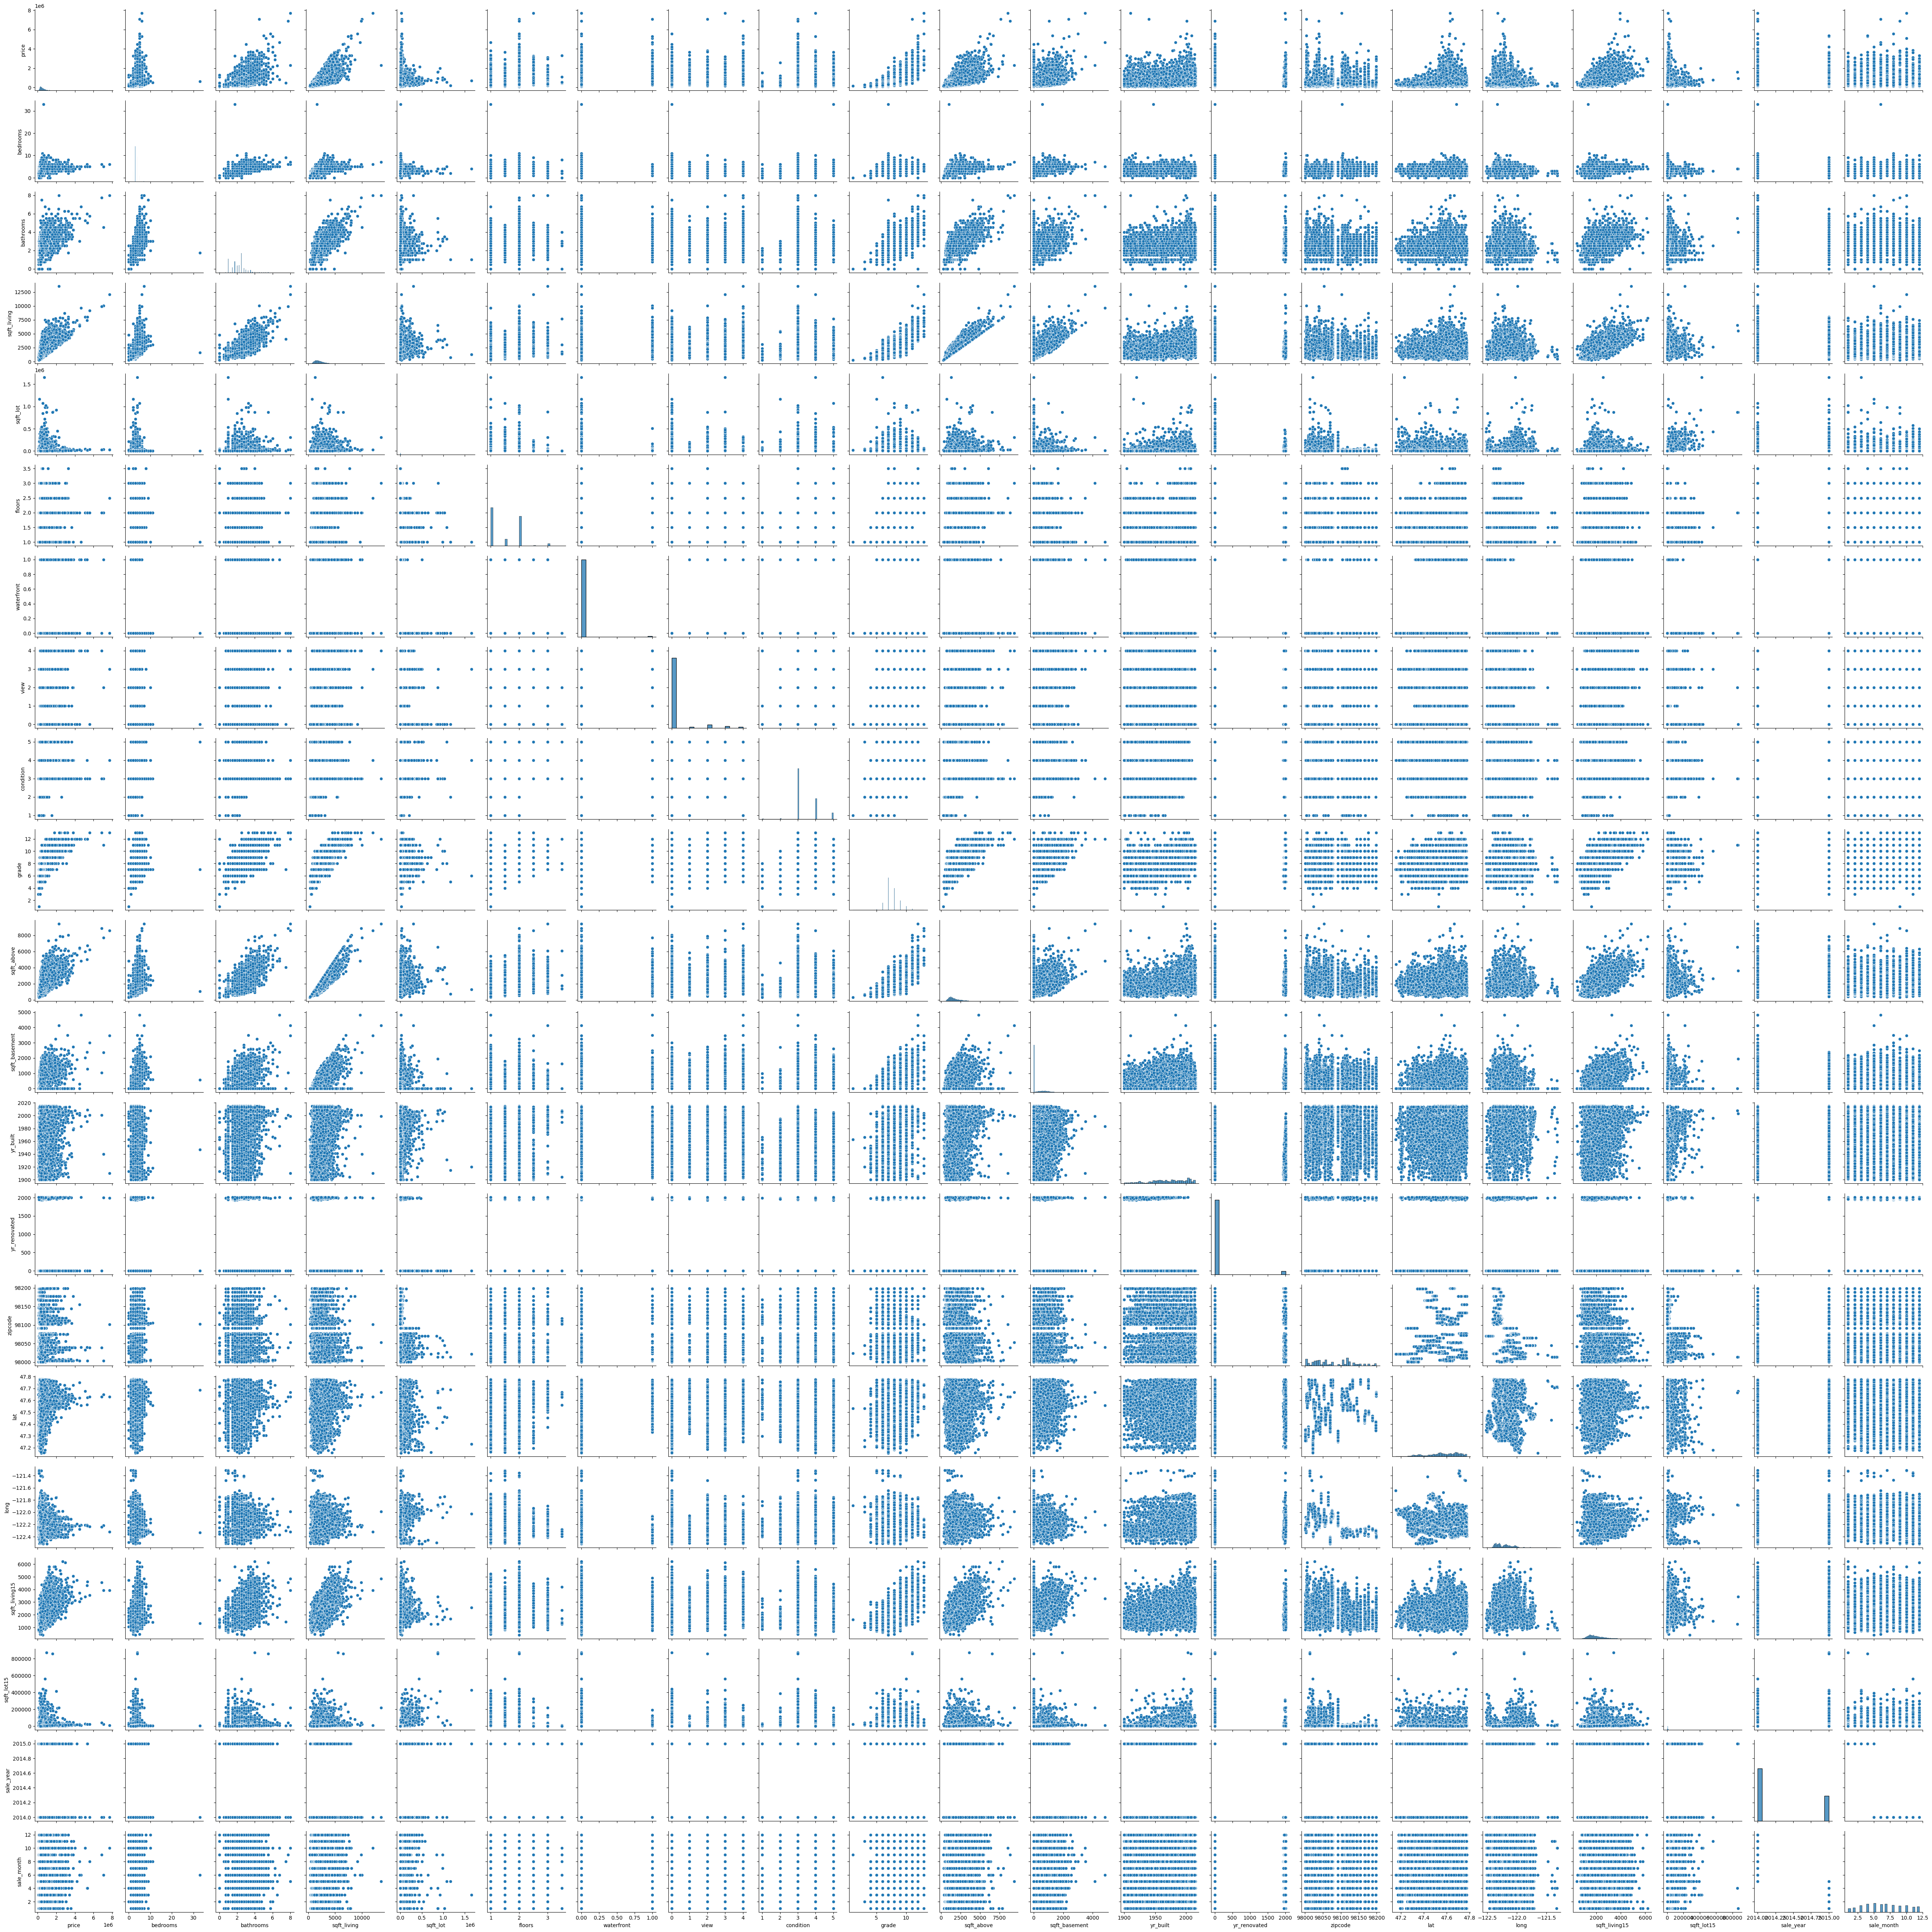

In [51]:
sns.pairplot(df.drop('id',axis=1))
plt.show()

In [52]:
plt.savefig('pairlot.png')

<Figure size 640x480 with 0 Axes>

### Scaling the columns

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
sc=StandardScaler()

In [18]:
df_standard=pd.DataFrame(sc.fit_transform(df.drop('id',axis=1)),columns=df.columns.drop('id'))

In [19]:
df_standard

price  bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
0     -0.866717 -0.398737  -1.447464    -0.979835 -0.228321 -0.915427   
1     -0.005688 -0.398737   0.175607     0.533634 -0.189885  0.936506   
2     -0.980849 -1.473959  -1.447464    -1.426254 -0.123298 -0.915427   
3      0.174090  0.676485   1.149449    -0.130550 -0.244014 -0.915427   
4     -0.081958 -0.398737  -0.149007    -0.435422 -0.169653 -0.915427   
...         ...       ...        ...          ...       ...       ...   
21608 -0.490545 -0.398737   0.500221    -0.598746 -0.337424  2.788439   
21609 -0.381588  0.676485   0.500221     0.250539 -0.224386  0.936506   
21610 -0.375865 -1.473959  -1.772078    -1.154047 -0.332137  0.936506   
21611 -0.381588 -0.398737   0.500221    -0.522528 -0.307076  0.936506   
21612 -0.585882 -1.473959  -1.772078    -1.154047 -0.338752  0.936506   

       waterfront      view  condition     grade  sqft_above  sqft_basement  \
0       -0.087173 -0.305759  -0.629187 -0.558836   -0.734708      -0.658681   
1       -0.087173 -0.305759  -0.629187 -0.558836    0.460841       0.245141   
2       -0.087173 -0.305759  -0.629187 -1.409587   -1.229834      -0.658681   
3       -0.087173 -0.305759   2.444294 -0.558836   -0.891699       1.397515   
4       -0.087173 -0.305759  -0.629187  0.291916   -0.130895      -0.658681   
...           ...       ...        ...       ...         ...            ...   
21608   -0.087173 -0.305759  -0.629187  0.291916   -0.312039      -0.658681   
21609   -0.087173 -0.305759  -0.629187  0.291916    0.629908      -0.658681   
21610   -0.087173 -0.305759  -0.629187 -0.558836   -0.927928      -0.658681   
21611   -0.087173 -0.305759  -0.629187  0.291916   -0.227505      -0.658681   
21612   -0.087173 -0.305759  -0.629187 -0.558836   -0.927928      -0.658681   

       yr_built  yr_renovated   zipcode       lat      long  sqft_living15  \
0     -0.544898     -0.210128  1.870152 -0.352572 -0.306079      -0.943355   
1     -0.681079      4.746678  0.879568  1.161568 -0.746341      -0.432686   
2     -1.293892     -0.210128 -0.933388  1.283537 -0.135655       1.070140   
3     -0.204446     -0.210128  1.085160 -0.283288 -1.271816      -0.914174   
4      0.544548     -0.210128 -0.073636  0.409550  1.199335      -0.272190   
...         ...           ...       ...       ...       ...            ...   
21608  1.293542     -0.210128  0.468382  1.004958 -0.938069      -0.666135   
21609  1.463768     -0.210128  1.272063 -0.356180 -1.051685      -0.228419   
21610  1.293542     -0.210128  1.234683  0.247888 -0.604321      -1.410253   
21611  1.123316     -0.210128 -0.952078 -0.184414  1.028910      -0.841221   
21612  1.259497     -0.210128  1.234683  0.245723 -0.604321      -1.410253   

       sqft_lot15  sale_year  sale_month  
0       -0.260715  -0.690655    1.099621  
1       -0.187868  -0.690655    1.741627  
2       -0.172375   1.447901   -1.468403  
3       -0.284522  -0.690655    1.741627  
4       -0.192849   1.447901   -1.468403  
...           ...        ...         ...  
21608   -0.412381  -0.690655   -0.505394  
21609   -0.203946   1.447901   -1.468403  
21610   -0.394141  -0.690655   -0.184391  
21611   -0.420511   1.447901   -1.789406  
21612   -0.417948  -0.690655    1.099621  

[21613 rows x 21 columns]

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
df_s_x=df_standard.drop('price',axis=1)

In [22]:
df_s_y=df_standard['price']

In [23]:
x_train,x_test,y_train,y_test=train_test_split(df_s_x,df_s_y,test_size=0.3,random_state=1)

### Model building with standardisation


In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
lr=LinearRegression()

In [26]:
lr.fit(x_train,y_train)

LinearRegression()

In [27]:
c=lr.intercept_
c

-0.004933907421238698

In [28]:
m=lr.coef_
m

array([-8.00549017e-02,  7.61216133e-02,  3.96311081e+12,  1.07090400e-02,
        1.51352971e-02,  1.32652527e-01,  1.07239962e-01,  5.07589383e-02,
        3.04616655e-01, -3.57324713e+12, -1.90972978e+12, -2.03936336e-01,
        2.51913237e-02, -8.00258082e-02,  2.32842010e-01, -7.84077050e-02,
        3.66304674e-02, -2.22868308e-02,  4.39487985e-02,  1.08729339e-02])

#### Equation for the best fit line

In [29]:
print('Price',end='=')
for i,col in zip(m,df_s_x.columns):
    print(i,col,sep='*',end='+')
print(f'{c}')


Price=-0.08005490169553604*bedrooms+0.07612161329132211*bathrooms+3963110807507.4214*sqft_living+0.01070904002763971*sqft_lot+0.015135297056870604*floors+0.1326525269546765*waterfront+0.107239962457357*view+0.05075893833808899*condition+0.3046166547372467*grade+-3573247134011.348*sqft_above+-1909729782730.458*sqft_basement+-0.2039363362169098*yr_built+0.025191323650600277*yr_renovated+-0.08002580824590533*zipcode+0.23284201043943867*lat+-0.07840770504848096*long+0.03663046736611422*sqft_living15+-0.022286830809124233*sqft_lot15+0.04394879848923177*sale_year+0.01087293393959655*sale_month+-0.004933907421238698


#### Test score

In [30]:
lr.score(x_train,y_train)

0.7053238691780683

There 70% accuracy for training data

In [31]:
lr.score(x_test,y_test)

0.6922702859593077

There is 69% accuracy for test data

In [32]:
from sklearn.metrics import mean_squared_error

In [33]:
y_pred=lr.predict(x_test)

#### Test data

In [34]:
mse=mean_squared_error(y_test,y_pred)
mse

0.3563499759988016

In [35]:
rmse=np.sqrt(mse)
rmse

0.5969505641163274

#### Train data

In [36]:
mse=mean_squared_error(lr.predict(x_train),y_train)
mse

0.2746806044352007

In [37]:
rmse=np.sqrt(mse)
rmse

0.5240998038877717

In [38]:
from sklearn.metrics import r2_score

In [39]:
r2=r2_score(y_test,y_pred)
r2

0.6922702859593077

The R square value for test data is 69.22%

#### Adjusted R square

In [40]:
#n is the number of records
n=x_test.shape[0]
#p is the number of features
p=x_test.shape[1]

In [41]:
adj_r2=1-(1-r2)*(n-1)/(n-p-1)

In [42]:
adj_r2

0.6913180046223413

**The adjusted R2 value for the teat data is 69.13%**

### Model without standardisation

In [43]:
df.head()

id     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  7129300520  221900.0         3       1.00         1180      5650     1.0   
1  6414100192  538000.0         3       2.25         2570      7242     2.0   
2  5631500400  180000.0         2       1.00          770     10000     1.0   
3  2487200875  604000.0         4       3.00         1960      5000     1.0   
4  1954400510  510000.0         3       2.00         1680      8080     1.0   

   waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  \
0           0     0          3      7        1180              0      1955   
1           0     0          3      7        2170            400      1951   
2           0     0          3      6         770              0      1933   
3           0     0          5      7        1050            910      1965   
4           0     0          3      8        1680              0      1987   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  \
0             0    98178  47.5112 -122.257           1340        5650   
1          1991    98125  47.7210 -122.319           1690        7639   
2             0    98028  47.7379 -122.233           2720        8062   
3             0    98136  47.5208 -122.393           1360        5000   
4             0    98074  47.6168 -122.045           1800        7503   

   sale_year  sale_month  
0       2014          10  
1       2014          12  
2       2015           2  
3       2014          12  
4       2015           2

In [44]:
df_x=df.drop(['id','price'],axis=1)

In [45]:
df_y=df['price']

In [46]:
x1,x2,y1,y2=train_test_split(df_x,df_y,test_size=0.3,random_state=10)

In [47]:
linear_reg=LinearRegression()

In [48]:
linear_reg.fit(x1,y1)

LinearRegression()

In [49]:
linear_reg.score(x2,y2)

0.7109386628713962

In [50]:
linear_reg.score(x1,y1)

0.6962248122529817

### This model have test accuracy 71%